In [1]:
filename = 'iris.data'
f = open(filename,'r')

datapoints = []

for x in f:
    temp_ls = []
    temp = ''
    for ch in x:
        if (ch >= '0' and ch <='9') or (ch == '.'):
#             print('ch:' + ch +' temp:' + temp)
            temp += ch
        elif ch == ',':
#             print('temp:' + temp)
            temp_ls.append(float(temp))
            temp = ''
        else:
            if(temp_ls != []):
                datapoints.append(temp_ls)
            break

# print(datapoints)

In [2]:
for i in datapoints:
    print(i)

[5.1, 3.5, 1.4, 0.2]
[4.9, 3.0, 1.4, 0.2]
[4.7, 3.2, 1.3, 0.2]
[4.6, 3.1, 1.5, 0.2]
[5.0, 3.6, 1.4, 0.2]
[5.4, 3.9, 1.7, 0.4]
[4.6, 3.4, 1.4, 0.3]
[5.0, 3.4, 1.5, 0.2]
[4.4, 2.9, 1.4, 0.2]
[4.9, 3.1, 1.5, 0.1]
[5.4, 3.7, 1.5, 0.2]
[4.8, 3.4, 1.6, 0.2]
[4.8, 3.0, 1.4, 0.1]
[4.3, 3.0, 1.1, 0.1]
[5.8, 4.0, 1.2, 0.2]
[5.7, 4.4, 1.5, 0.4]
[5.4, 3.9, 1.3, 0.4]
[5.1, 3.5, 1.4, 0.3]
[5.7, 3.8, 1.7, 0.3]
[5.1, 3.8, 1.5, 0.3]
[5.4, 3.4, 1.7, 0.2]
[5.1, 3.7, 1.5, 0.4]
[4.6, 3.6, 1.0, 0.2]
[5.1, 3.3, 1.7, 0.5]
[4.8, 3.4, 1.9, 0.2]
[5.0, 3.0, 1.6, 0.2]
[5.0, 3.4, 1.6, 0.4]
[5.2, 3.5, 1.5, 0.2]
[5.2, 3.4, 1.4, 0.2]
[4.7, 3.2, 1.6, 0.2]
[4.8, 3.1, 1.6, 0.2]
[5.4, 3.4, 1.5, 0.4]
[5.2, 4.1, 1.5, 0.1]
[5.5, 4.2, 1.4, 0.2]
[4.9, 3.1, 1.5, 0.1]
[5.0, 3.2, 1.2, 0.2]
[5.5, 3.5, 1.3, 0.2]
[4.9, 3.1, 1.5, 0.1]
[4.4, 3.0, 1.3, 0.2]
[5.1, 3.4, 1.5, 0.2]
[5.0, 3.5, 1.3, 0.3]
[4.5, 2.3, 1.3, 0.3]
[4.4, 3.2, 1.3, 0.2]
[5.0, 3.5, 1.6, 0.6]
[5.1, 3.8, 1.9, 0.4]
[4.8, 3.0, 1.4, 0.3]
[5.1, 3.8, 1.6, 0.2]
[4.6, 3.2, 1.

In [3]:
print(len(datapoints))

150


In [4]:
import random
def assign_random_means(K):
    means_index = random.sample(range(0, 149), K)
    cluster_means = []
    for i in range(K):
        temp_pt = datapoints[means_index[i]]
        cluster_means.append(temp_pt)
    
#     print(cluster_means)
    return cluster_means


In [5]:
def distance(point_a,point_b):
    sum = 0
    for i in range(len(point_a)):
        sum += (point_a[i]-point_b[i])**2
    
    return (sum)

In [6]:
def create_clusters(cluster_means,K):
    cluster = {}
    for i in range(K):
        cluster[i] = []

    for point in datapoints:
        min_dist = 1000
        temp_cluster = -1
        for mean_index in range(len(cluster_means)):
            temp_distance = distance(point,cluster_means[mean_index])
            if temp_distance < min_dist:
                min_dist = temp_distance
                temp_cluster = mean_index

        cluster[temp_cluster].append(point)
    return cluster
        

In [7]:
def update_mean(cluster):
    new_means = []
    for c in cluster:
        temp_ls = cluster[c]
        if temp_ls == []:
            continue
        sum_ls = []
        dimension = len(temp_ls[0])
#         print('dimension:' + str(dimension))
        
        for i in range(dimension):
            sum_ls.append(0)
        
        for i in range(len(temp_ls)):
            for j in range(dimension):
                sum_ls[j] += temp_ls[i][j]
        
        avg_point = []
        for j in range(dimension):
            avg_point.append(sum_ls[j]/len(temp_ls))
        
        new_means.append(avg_point)
    return new_means

In [8]:
def converge(new_means, prev_means, allowed_diff):
    diff = 0
    for i in range(len(new_means)):
        dimension = len(new_means[0])
        for j in range(dimension):
            diff += abs(new_means[i][j] - prev_means[i][j])
    
    if diff <= allowed_diff:
        return True
    
    return False

In [20]:
def perform_K_means(K):

    cluster = {}
    for i in range(K):
        cluster[i] = []
        
    cluster_means = assign_random_means(K)

    allowed_diff = 0
    iteration_count = 0

    while(True):
        cluster = create_clusters(cluster_means,K)
    #     print(cluster)
        prev_means = cluster_means
        new_means = update_mean(cluster)

#         print('iteration count:' + str(iteration_count))
        iteration_count += 1
    #     print(cluster_means)
#         print()
#         print(new_means)
        flag = 0
#         print()
        if converge(new_means, prev_means, allowed_diff):
#             print('convergence')
            flag = 1
            break
        else:
            cluster_means = new_means

        if flag == 1:
            break
    
    return (cluster,new_means)

In [21]:
def calculate_sse(cluster,means,k):
    total_sum = 0;
    for i in range(k):
        for j in range(len(cluster[i])):
            diff = 0
            dimension = len(cluster[i][0])
            for d in range(dimension):
                diff += (cluster[i][j][d] - means[i][d])
            
            total_sum += diff**2
    
    return total_sum

In [22]:
sse = []

for i in range(1,30):
    (final_clusters,final_means)= perform_K_means(i)
    sse.append(calculate_sse(final_clusters,final_means,i))

In [26]:
import time

start = time.time()
(final_clusters,final_means)= perform_K_means(3)
end = time.time()

print('time taken for 3 clusters:' + str(end-start))

time taken for 3 clusters:0.004987955093383789


In [23]:
len(sse)

29

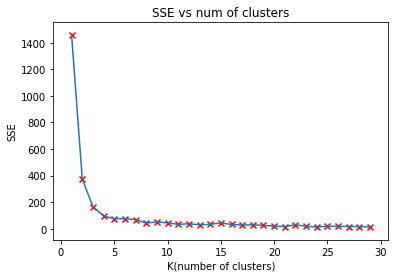

In [24]:
import matplotlib.pyplot as plt 

num_clusters = []
for i in range(1,30):
    num_clusters.append(i)

plt.plot(num_clusters, sse) 
plt.scatter(num_clusters, sse, c = 'red', marker = 'x')

plt.xlabel('K(number of clusters)') 
plt.ylabel('SSE') 

plt.title('SSE vs num of clusters') 

plt.show() 


In [25]:
print(sse)

[1458.0117333333321, 373.47141801206, 166.98093114754104, 95.41826392276428, 75.6761076923077, 74.86610434782607, 68.1194772727273, 42.22727330238203, 50.89092491779321, 43.837650840705194, 32.73487226516176, 36.976306281953356, 28.974347440507614, 32.57029377974966, 43.47212463768119, 31.443117035742027, 27.377538838612377, 28.916086829836843, 25.22397283272285, 18.89798051948051, 15.719789987789989, 29.433516206016222, 17.54155916305916, 12.600001831501833, 18.490619883040946, 17.762174242424244, 16.130198412698423, 15.129698412698408, 12.522819014319026]
